# Cleaning

In [7]:
import pandas as pd

df = pd.read_csv('C:\\Users\\keval\\Desktop\\Georgain\\2nd sem\\Data Analytics Project\\filtered.csv')

# Check for duplicate records and count them
num_duplicates = df.duplicated().sum()

# Print the number of duplicate records
print("Number of Duplicate Records:", num_duplicates)

Number of Duplicate Records: 0


In [9]:
# Remove records where the 'Age' column is 0
df_filtered = df[df['Age'] != 0]

# Save the filtered DataFrame to a new CSV file
df_filtered.to_csv('C:\\Users\\keval\\Desktop\\Georgain\\2nd sem\\Data Analytics Project\\filtered.csv', index=False)

# 1. Claims by Age tier 

In [11]:
import pandas as pd

df1 = pd.read_csv('C:\\Users\\keval\\Desktop\\Georgain\\2nd sem\\Data Analytics Project\\filtered.csv')

# Define the age categories
age_bins = [16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81]

# Create labels for the age categories
age_labels = ['16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70', '71-75', '76-80']

# Use the cut() function to categorize ages into bins and assign labels
df1['Age Category'] = pd.cut(df1['Age'], bins=age_bins, labels=age_labels, right=False)

# Count the total number of records in each age category
age_category_counts = df1['Age Category'].value_counts().reset_index()
age_category_counts.columns = ['Age Category', 'Record Count']

# Print the result
print(age_category_counts)


   Age Category  Record Count
0         31-35          2810
1         26-30          2783
2         41-45          2025
3         36-40          2018
4         46-50          1450
5         51-55          1378
6         56-60           718
7         61-65           674
8         21-25           613
9         71-75           186
10        66-70           164
11        76-80           158
12        16-20           123


# 2. Insurance New Policies per Agent 

In [12]:
import pandas as pd

# Group by 'RepNumber' and count the records for each agent
agent_counts = df1['RepNumber'].value_counts().reset_index()
agent_counts.columns = ['Agent', 'Record Count']

# Print the result
print(agent_counts)

    Agent  Record Count
0       7          1042
1      10           973
2       1           972
3       9           972
4       5           969
5      12           961
6      15           948
7      16           943
8       2           931
9       3           929
10     11           929
11     14           925
12      6           918
13      4           904
14      8           904
15     13           880


# 3. Top model (Make column) that have the most claims

In [4]:
import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = 'C:\\Users\\keval\\Desktop\\Georgain\\2nd sem\\Data Analytics Project\\filtered.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Count the occurrences of each value in the 'make' column
make_counts = df['Make'].value_counts()

# Display the count of all values in descending order
make_counts_descending = make_counts.sort_values(ascending=False)
print(make_counts_descending.head(5))


Pontiac      3837
Toyota       3121
Honda        2482
Mazda        2354
Chevrolet    1681
Name: Make, dtype: int64


# 4 Top model (Vehicle category column) that have the most claims

In [15]:
# Count the occurrences of each value in the 'make' column
make_counts = df['VehicleCategory'].value_counts()

# Display the count of all values in descending order
make_counts_descending = make_counts.sort_values(ascending=False)
print(make_counts_descending)

Sedan      9510
Sport      5208
Utility     382
Name: VehicleCategory, dtype: int64


# 5. Top model (Make column) that have the least claims

In [5]:
# Count the occurrences of each value in the 'make' column
make_counts = df['Make'].value_counts()

# Display the count of all values in descending order
make_counts_descending = make_counts.sort_values()
print(make_counts_descending.head(5))

Lexus      1
Ferrari    2
Mecedes    4
Porche     5
Jaguar     6
Name: Make, dtype: int64


# 6. Average Time to Settle a Claim

In [17]:
# Sample DataFrame creation
data = {'Days_Policy_Accident': ['more than 30', '15 to 30', 'none'],
        'Days_Policy_Claim': ['more than 30', '15 to 30', '8 to 15']}
df = pd.DataFrame(data)

# Mapping categorical values to numerical values
mapping = {'none': 0, '1 to 7': 7, '8 to 15': 15, '15 to 30': 30, 'more than 30': 31}

# Applying the mapping to the DataFrame
df['Days_Policy_Accident_Num'] = df['Days_Policy_Accident'].map(mapping)
df['Days_Policy_Claim_Num'] = df['Days_Policy_Claim'].map(mapping)

# Calculate the difference and the Average Time to Settle a Claim
df['Days_to_Settle_Claim'] = df['Days_Policy_Claim_Num'] - df['Days_Policy_Accident_Num']
average_time_to_settle = df['Days_to_Settle_Claim'].mean()

print("Average Time to Settle a Claim:", average_time_to_settle)


Average Time to Settle a Claim: 5.0


# 7. Quote Rate

In [18]:
import pandas as pd

# Assuming df is your DataFrame with the larger dataset
# Calculate the quote rate
total_opportunities = len(df)
number_of_quotes = total_opportunities  # Assuming each row represents a quote

quote_rate = number_of_quotes / total_opportunities

# Display the result
print("Quote Rate:", quote_rate)


Quote Rate: 1.0


# 8. Insurance Percentage Churn KPI

assuming that a policy has churned (not renewed) if the 'FraudFound_P' variable is equal to 1.

In [19]:
import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = 'C:\\Users\\keval\\Desktop\\Georgain\\2nd sem\\Data Analytics Project\\filtered.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Calculate Insurance Percentage Churn
total_policies = len(df)
churned_policies = len(df[df['FraudFound_P'] == 1])

insurance_percentage_churn = (churned_policies / total_policies) * 100

# Display the result
print("Insurance Percentage Churn:", insurance_percentage_churn)


Insurance Percentage Churn: 5.9072847682119205


# 9. New Policies Historical Trend

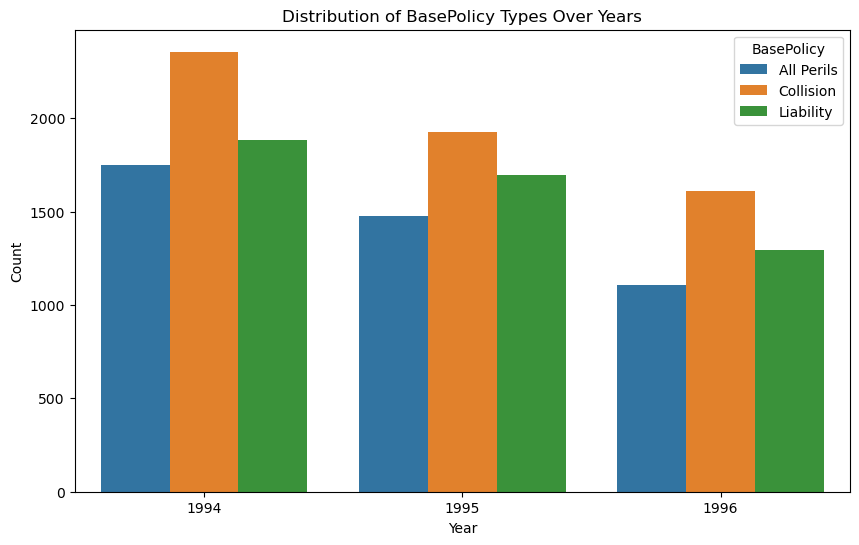

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


# Convert categorical columns to appropriate data types
categorical_columns = ['BasePolicy']
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Plotting the graph
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df, hue='BasePolicy')
plt.title('Distribution of BasePolicy Types Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


# 10. Insurance Retention Rate 

In [27]:
# Assuming 0 indicates renewal and 1 indicates non-renewal
renewed_policies = df[df['FraudFound_P'] == 0]
total_policies = len(df)

retention_rate = (len(renewed_policies) / total_policies) * 100

print(f'Insurance Retention Rate: {retention_rate:.2f}%')


Insurance Retention Rate: 94.09%


# 11. Average Cost Per Claim

In [22]:
# Calculate Average Cost Per Claim
total_claim_cost = df['Deductible'].sum()
total_claims = len(df)

average_cost_per_claim = total_claim_cost / total_claims

print(f'Average Cost Per Claim: ${average_cost_per_claim:.2f}')


Average Cost Per Claim: $407.87


# 12. Yearly Growth

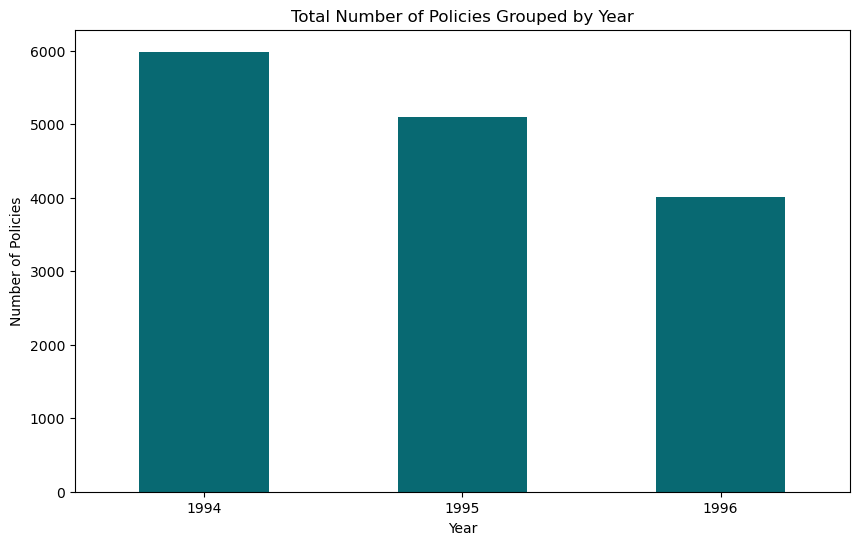

In [31]:
#Grouping by year
policy_counts_by_year = df.groupby('Year')['PolicyNumber'].count()

#Plotting
plt.figure(figsize=(10, 6))
policy_counts_by_year.plot(kind='bar', color='#086972')
plt.title('Total Number of Policies Grouped by Year')
plt.xlabel('Year')
plt.ylabel('Number of Policies')
plt.xticks(rotation=0)
plt.show()

# 13. Profitable Regions

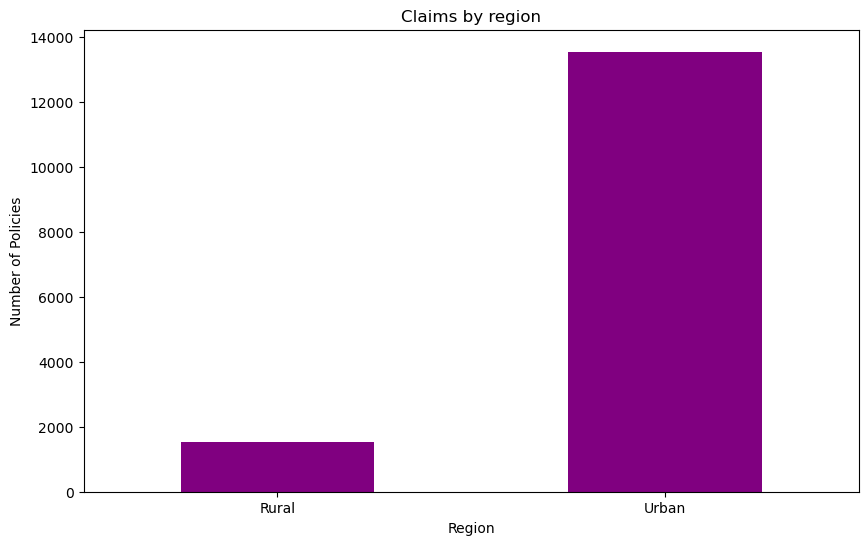

In [39]:
#Grouping by region
policy_counts_by_year = df.groupby('AccidentArea')['PolicyNumber'].count()

#Plotting
plt.figure(figsize=(10, 6))
policy_counts_by_year.plot(kind='bar', color='purple')
plt.title('Claims by region')
plt.xlabel('Region')
plt.ylabel('Number of Policies')
plt.xticks(rotation=0)
plt.show()

# 14. Insurance Fraud Percentage

Total Fraud Found: 892
Total Fraud Percentage: 5.91%


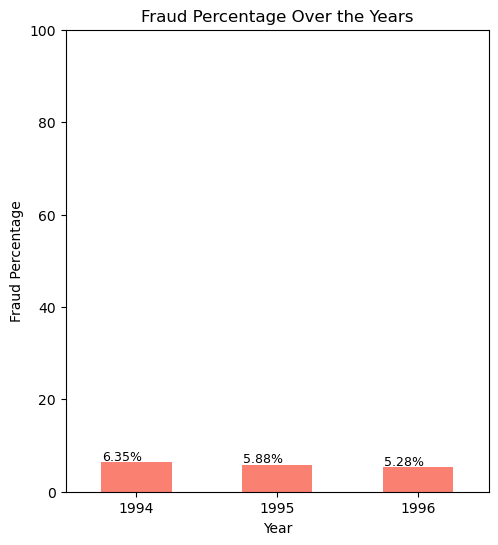

In [46]:
# Calculate the total fraud percentage
total_fraud_percentage = (total_fraud_found / total_policies) * 100

# Print the results
print(f'Total Fraud Found: {total_fraud_found}')
print(f'Total Fraud Percentage: {total_fraud_percentage:.2f}%')


# Group by 'Year' and calculate the fraud percentage for each year
fraud_percentage_by_year = df.groupby('Year')['FraudFound_P'].mean() * 100

# Calculate the total fraud found over all years
total_fraud_found = df['FraudFound_P'].sum()

# Plotting
plt.figure(figsize=(12, 6))

# Bar plot for yearly fraud percentages
plt.subplot(1, 2, 1)
bars = fraud_percentage_by_year.plot(kind='bar', color='salmon')
plt.title('Fraud Percentage Over the Years')
plt.xlabel('Year')
plt.ylabel('Fraud Percentage')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.ylim(0, 100)  # Set y-axis limit to percentage range

# Adding labels on top of the bars
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.5,
             f'{bar.get_height():.2f}%', ha='center', color='black', fontsize=9)

plt.show()
